<a href="https://www.kaggle.com/code/roberttarus/canada-food-prices-analysis-2017-to-2023?scriptVersionId=160894848" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/canadian-food-prices/Canadian_Food_Prices.csv


# **Source of Data**

The dataset used in this analysis is derived from food price data spanning the years 2017 to 2023. The primary source for this dataset is Statistics Canada, the national statistical agency of Canada. The dataset covers a range of food prices, offering insights into trends and patterns over the specified period. For more detailed information or access to the original dataset, please visit the official Statistics Canada website at https://www150.statcan.gc.ca/t1/tbl1/en/tv.action?pid=1810024502

# **Influence of Inflation on the Data**

The dataset spans the years 2017 to 2023, a period during which inflation has played a notable role in shaping economic dynamics. As a key economic indicator, inflation can have a profound effect on food prices, impacting consumer purchasing power and market trends. Throughout the analyzed period, shifts in inflation rates may be reflected in the dataset, influencing the observed fluctuations in food prices. It is essential to consider the inflationary context when interpreting pricing trends, as these variations may be indicative of broader economic conditions. Further exploration and correlation analysis between inflation rates and food prices can provide deeper insights into the relationship between economic factors and the dataset.

# **Step 1: Importing and Reading Data**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
import geopandas as gpd
import os
import shutil
import plotly.express as px
plt.style.use('ggplot')
# pd.set_option('max_columns', 200)

In [3]:
df = pd.read_csv('/kaggle/input/canadian-food-prices/Canadian_Food_Prices.csv')

# **Step 2: Understanding the Data**

* Dataframe shape
* head
* data types
* describe

In [4]:
df.shape

(100347, 15)

In [5]:
df.head(10) #Display the first ten rows of the dataframe.

REF_DATE     GEO           DGUID                             Products  \
0  2017-01  Canada  2016A000011124      Beef stewing cuts, per kilogram   
1  2017-01  Canada  2016A000011124    Beef striploin cuts, per kilogram   
2  2017-01  Canada  2016A000011124  Beef top sirloin cuts, per kilogram   
3  2017-01  Canada  2016A000011124          Beef rib cuts, per kilogram   
4  2017-01  Canada  2016A000011124            Ground beef, per kilogram   
5  2017-01  Canada  2016A000011124         Pork loin cuts, per kilogram   
6  2017-01  Canada  2016A000011124          Pork rib cuts, per kilogram   
7  2017-01  Canada  2016A000011124     Pork shoulder cuts, per kilogram   
8  2017-01  Canada  2016A000011124          Whole chicken, per kilogram   
9  2017-01  Canada  2016A000011124        Chicken breasts, per kilogram   

       UOM  UOM_ID SCALAR_FACTOR  SCALAR_ID       VECTOR  COORDINATE  VALUE  \
0  Dollars      81         units          0  v1353834271       11.10  12.66   
1  Dollars      81         units          0  v1353834272       11.20  21.94   
2  Dollars      81         units          0  v1353834273       11.30  13.44   
3  Dollars      81         units          0  v1353834311       11.41  20.17   
4  Dollars      81         units          0  v1353834274       11.40   9.12   
5  Dollars      81         units          0  v1353834275       11.50   7.34   
6  Dollars      81         units          0  v1353834276       11.60   7.37   
7  Dollars      81         units          0  v1353834312       11.42   4.76   
8  Dollars      81         units          0  v1353834277       11.70   5.15   
9  Dollars      81         units          0  v1353834278       11.80  11.38   

   STATUS  SYMBOL  TERMINATED  DECIMALS  
0     NaN     NaN         NaN         2  
1     NaN     NaN         NaN         2  
2     NaN     NaN         NaN         2  
3     NaN     NaN         NaN         2  
4     NaN     NaN         NaN         2  
5     NaN     NaN         NaN         2  
6     NaN     NaN         NaN         2  
7     NaN     NaN         NaN         2  
8     NaN     NaN         NaN         2  
9     NaN     NaN         NaN         2

In [6]:
df.columns #Column labels of a dataframe

Index(['REF_DATE', 'GEO', 'DGUID', 'Products', 'UOM', 'UOM_ID',
       'SCALAR_FACTOR', 'SCALAR_ID', 'VECTOR', 'COORDINATE', 'VALUE', 'STATUS',
       'SYMBOL', 'TERMINATED', 'DECIMALS'],
      dtype='object')

In [7]:
df.dtypes #Data types of column labels

REF_DATE          object
GEO               object
DGUID             object
Products          object
UOM               object
UOM_ID             int64
SCALAR_FACTOR     object
SCALAR_ID          int64
VECTOR            object
COORDINATE       float64
VALUE            float64
STATUS           float64
SYMBOL           float64
TERMINATED       float64
DECIMALS           int64
dtype: object

In [8]:
df.describe() #A summary of the dataframe statistics

UOM_ID  SCALAR_ID     COORDINATE          VALUE  STATUS  SYMBOL  \
count  100347.0   100347.0  100347.000000  100347.000000     0.0     0.0   
mean       81.0        0.0       6.501741       5.270597     NaN     NaN   
std         0.0        0.0       3.172175       4.938450     NaN     NaN   
min        81.0        0.0       1.100000       0.300000     NaN     NaN   
25%        81.0        0.0       3.750000       2.780000     NaN     NaN   
50%        81.0        0.0       6.500000       3.890000     NaN     NaN   
75%        81.0        0.0       9.240000       5.630000     NaN     NaN   
max        81.0        0.0      11.990000      44.610000     NaN     NaN   

       TERMINATED  DECIMALS  
count         0.0  100347.0  
mean          NaN       2.0  
std           NaN       0.0  
min           NaN       2.0  
25%           NaN       2.0  
50%           NaN       2.0  
75%           NaN       2.0  
max           NaN       2.0

# **Step 3: Data Preparation and Cleaning**

* Dropping irrelevant columns and rows
* Identifying duplicated columns
* Renaming columns
* Feature Creation

In [9]:
df.head()

REF_DATE     GEO           DGUID                             Products  \
0  2017-01  Canada  2016A000011124      Beef stewing cuts, per kilogram   
1  2017-01  Canada  2016A000011124    Beef striploin cuts, per kilogram   
2  2017-01  Canada  2016A000011124  Beef top sirloin cuts, per kilogram   
3  2017-01  Canada  2016A000011124          Beef rib cuts, per kilogram   
4  2017-01  Canada  2016A000011124            Ground beef, per kilogram   

       UOM  UOM_ID SCALAR_FACTOR  SCALAR_ID       VECTOR  COORDINATE  VALUE  \
0  Dollars      81         units          0  v1353834271       11.10  12.66   
1  Dollars      81         units          0  v1353834272       11.20  21.94   
2  Dollars      81         units          0  v1353834273       11.30  13.44   
3  Dollars      81         units          0  v1353834311       11.41  20.17   
4  Dollars      81         units          0  v1353834274       11.40   9.12   

   STATUS  SYMBOL  TERMINATED  DECIMALS  
0     NaN     NaN         NaN         2  
1     NaN     NaN         NaN         2  
2     NaN     NaN         NaN         2  
3     NaN     NaN         NaN         2  
4     NaN     NaN         NaN         2

In [10]:
#Dropping columns not in use.
df = df[['REF_DATE', 'GEO', 
    #'DGUID', 
    'Products', 
    #'UOM', 
    #'UOM_ID',
     #  'SCALAR_FACTOR', 
    #'SCALAR_ID', 'VECTOR', 
    'COORDINATE', 
    'VALUE', 
    #'STATUS',
    # 'SYMBOL', 'TERMINATED', 
    'DECIMALS'
   ]].copy()  #Creates a deep deep copy, changes made to original dataset won't affect it.

In [11]:
df.shape #Number of rows and columns in the dataframe

(100347, 6)

The new data now has 100,347 rows and 6 columns.

In [12]:
df.dtypes

REF_DATE       object
GEO            object
Products       object
COORDINATE    float64
VALUE         float64
DECIMALS        int64
dtype: object

The column REF_DATE should be converted to a date data type.

In [13]:
# Converting REF_DATE to a date data type
df['REF_DATE'] = pd.to_datetime(df['REF_DATE'])
df.dtypes

REF_DATE      datetime64[ns]
GEO                   object
Products              object
COORDINATE           float64
VALUE                float64
DECIMALS               int64
dtype: object

In [14]:
# Renaming the columns.
df = df.rename(columns={'REF_DATE': 'Date', 
                   'GEO': 'GeoLocation',
                   'Products': 'Products',
                    'COORDINATE': 'Coordinates',
                    'DECIMALS': 'Decimals',
                   'VALUE': 'Price'})

In [15]:
df.head()

Date GeoLocation                             Products  Coordinates  \
0 2017-01-01      Canada      Beef stewing cuts, per kilogram        11.10   
1 2017-01-01      Canada    Beef striploin cuts, per kilogram        11.20   
2 2017-01-01      Canada  Beef top sirloin cuts, per kilogram        11.30   
3 2017-01-01      Canada          Beef rib cuts, per kilogram        11.41   
4 2017-01-01      Canada            Ground beef, per kilogram        11.40   

   Price  Decimals  
0  12.66         2  
1  21.94         2  
2  13.44         2  
3  20.17         2  
4   9.12         2

In [16]:
df.tail()

Date       GeoLocation                        Products  \
100342 2023-11-01  British Columbia     Sunflower seeds, 400 grams    
100343 2023-11-01  British Columbia             Deodorant, 85 grams   
100344 2023-11-01  British Columbia     Toothpaste, 100 millilitres   
100345 2023-11-01  British Columbia        Shampoo, 400 millilitres   
100346 2023-11-01  British Columbia  Laundry detergent, 4.43 litres   

        Coordinates  Price  Decimals  
100342       10.109   4.23         2  
100343       10.750   7.59         2  
100344       10.760   4.13         2  
100345       10.770   7.04         2  
100346       10.110  16.31         2

In [17]:
# Checking to see if there are missing values in the data.
df.isna().sum()

Date           0
GeoLocation    0
Products       0
Coordinates    0
Price          0
Decimals       0
dtype: int64

In [18]:
#Checking for duplicates.
df.loc[df.duplicated()]

Empty DataFrame
Columns: [Date, GeoLocation, Products, Coordinates, Price, Decimals]
Index: []

In [19]:
#Descriptive Statistics.
mean_price = df['Price'].mean()
median_price = df['Price'].median()
std_dev_price = df['Price'].std()
min_price = df['Price'].min()
max_price = df['Price'].max()

# Display the individual statistics
print(f"Mean: {mean_price}")
print(f"Median: {median_price}")
print(f"Standard Deviation: {std_dev_price}")
print(f"Minimum: {min_price}")
print(f"Maximum: {max_price}")
#Alternative is df.describe()

Mean: 5.270597028311758
Median: 3.89
Standard Deviation: 4.938449970431831
Minimum: 0.3
Maximum: 44.61


In [20]:
df.describe()

Date    Coordinates          Price  Decimals
count                         100347  100347.000000  100347.000000  100347.0
mean   2020-05-31 19:57:06.506023936       6.501741       5.270597       2.0
min              2017-01-01 00:00:00       1.100000       0.300000       2.0
25%              2018-09-01 00:00:00       3.750000       2.780000       2.0
50%              2020-06-01 00:00:00       6.500000       3.890000       2.0
75%              2022-03-01 00:00:00       9.240000       5.630000       2.0
max              2023-11-01 00:00:00      11.990000      44.610000       2.0
std                              NaN       3.172175       4.938450       0.0

# **Step 4: Exploratory Data Analysis**

Univariate Analysis

Plotting feature distributions:
* Bar Chart
* Histogram
* KDE
* Boxplot

Text(0, 0.5, 'Count')

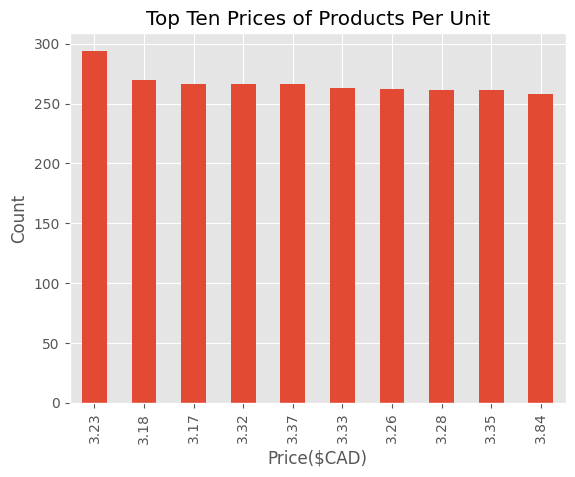

In [21]:
#Bar Chart
ax = df['Price'].value_counts().head(10).plot(kind='bar', title='Top Ten Prices of Products Per Unit')
ax.set_xlabel('Price($CAD)')
ax.set_ylabel('Count')

Text(0.5, 0, 'Product Price ($)')

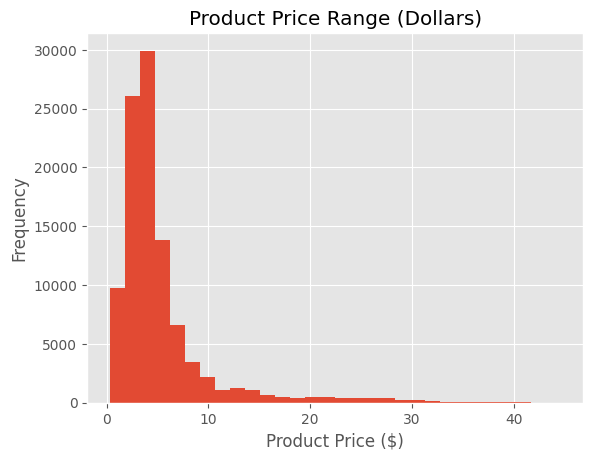

In [22]:
#Histogram
ax = df['Price'].plot(kind='hist', bins=30, title='Product Price Range (Dollars)')
ax.set_xlabel('Product Price ($)')

Text(0.5, 0, 'Product Price ($)')

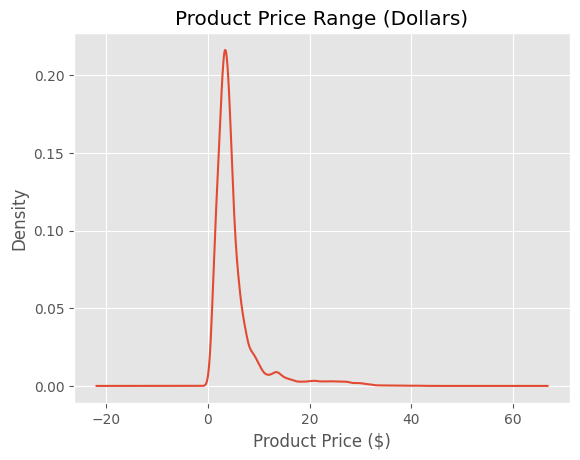

In [23]:
#KDE
ax = df['Price'].plot(kind='kde', title='Product Price Range (Dollars)')
ax.set_xlabel('Product Price ($)')

Text(0.5, 1.0, 'Scatter Plot of Price vs. Geolocation')

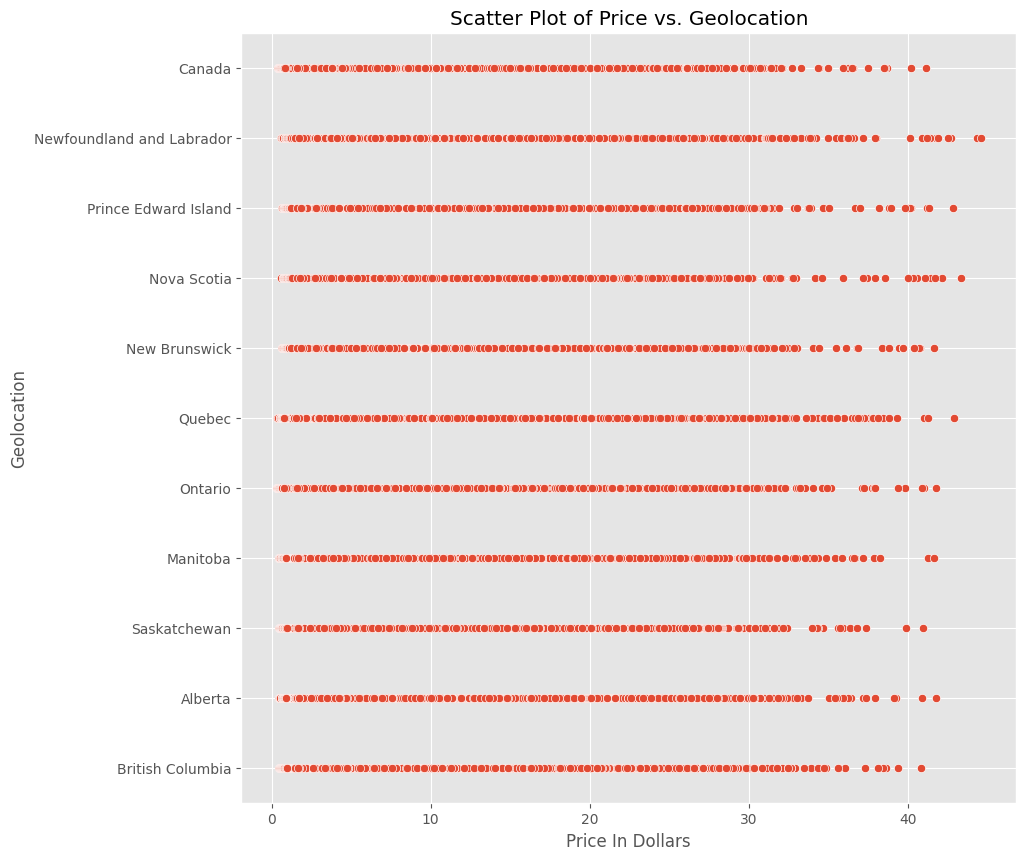

In [24]:
#SCATTER PLOT

plt.figure(figsize=(10, 10))
sns.scatterplot(x='Price', y='GeoLocation', data=df)
plt.xlabel('Price In Dollars')
plt.ylabel('Geolocation')
plt.title('Scatter Plot of Price vs. Geolocation')

# **Mean Prices trend of Products from 2017 to 2023**

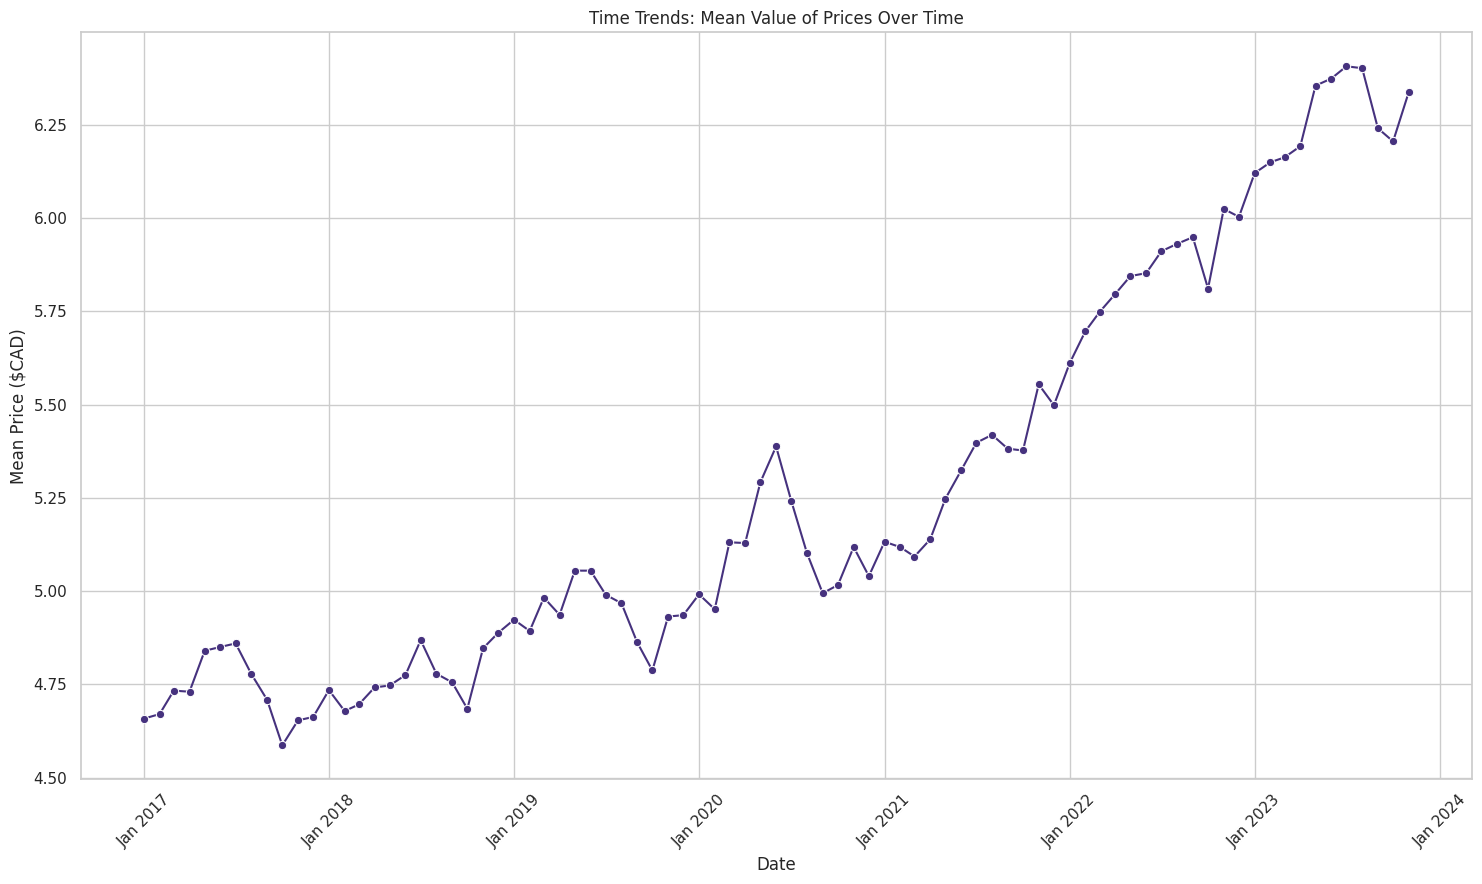

In [25]:
time_trends = df.groupby('Date')['Price'].mean()

# Replace inf values with NaN
time_trends.replace([np.inf, -np.inf], np.nan, inplace=True)

# Use seaborn for a consistent style
sns.set(style="whitegrid", palette="viridis")

# Plotting the time series graph with a modern style
plt.figure(figsize=(15, 9))

# Use sns.lineplot for a line plot with markers
sns.lineplot(x=time_trends.index, y=time_trends.values, marker='o')

# Format the x-axis as months and years
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%b %Y'))

# Customize the plot
plt.title('Time Trends: Mean Value of Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Mean Price ($CAD)')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(True)
plt.tight_layout()  # Adjust layout to prevent clipping labels
plt.show()



**Note: The hike in prices on June 2020 stands out. Upon further research, it is noted that in June of 2020, due to COVID-19 outbreak there were closures in food processing facilities as written in this link: **https://www150.statcan.gc.ca/n1/pub/62f0014m/62f0014m2022014-eng.htm

# **Average Prices of Products across the Provinces vs Canada's Average Price**

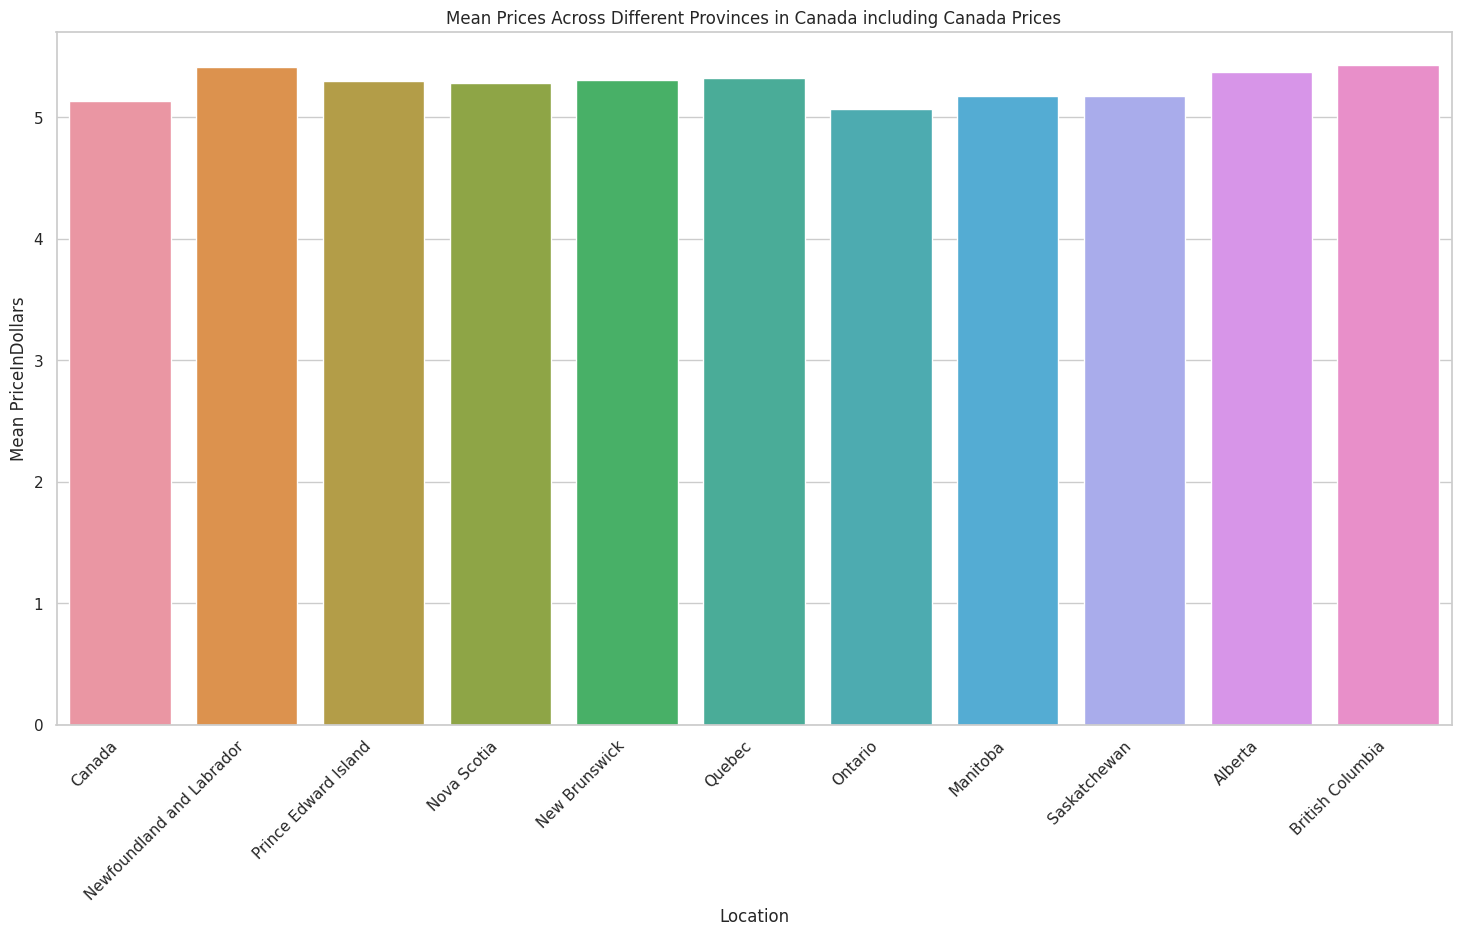

In [26]:
# Create a bar chart to compare the mean prices for each location
plt.figure(figsize=(18, 9))
sns.barplot(x='GeoLocation', y='Price', data=df, errorbar=None)
plt.title('Mean Prices Across Different Provinces in Canada including Canada Prices')
plt.xlabel('Location')
plt.ylabel('Mean PriceInDollars')
plt.xticks(rotation=45, ha='right')
plt.show()

# **Boxplot for all Products**

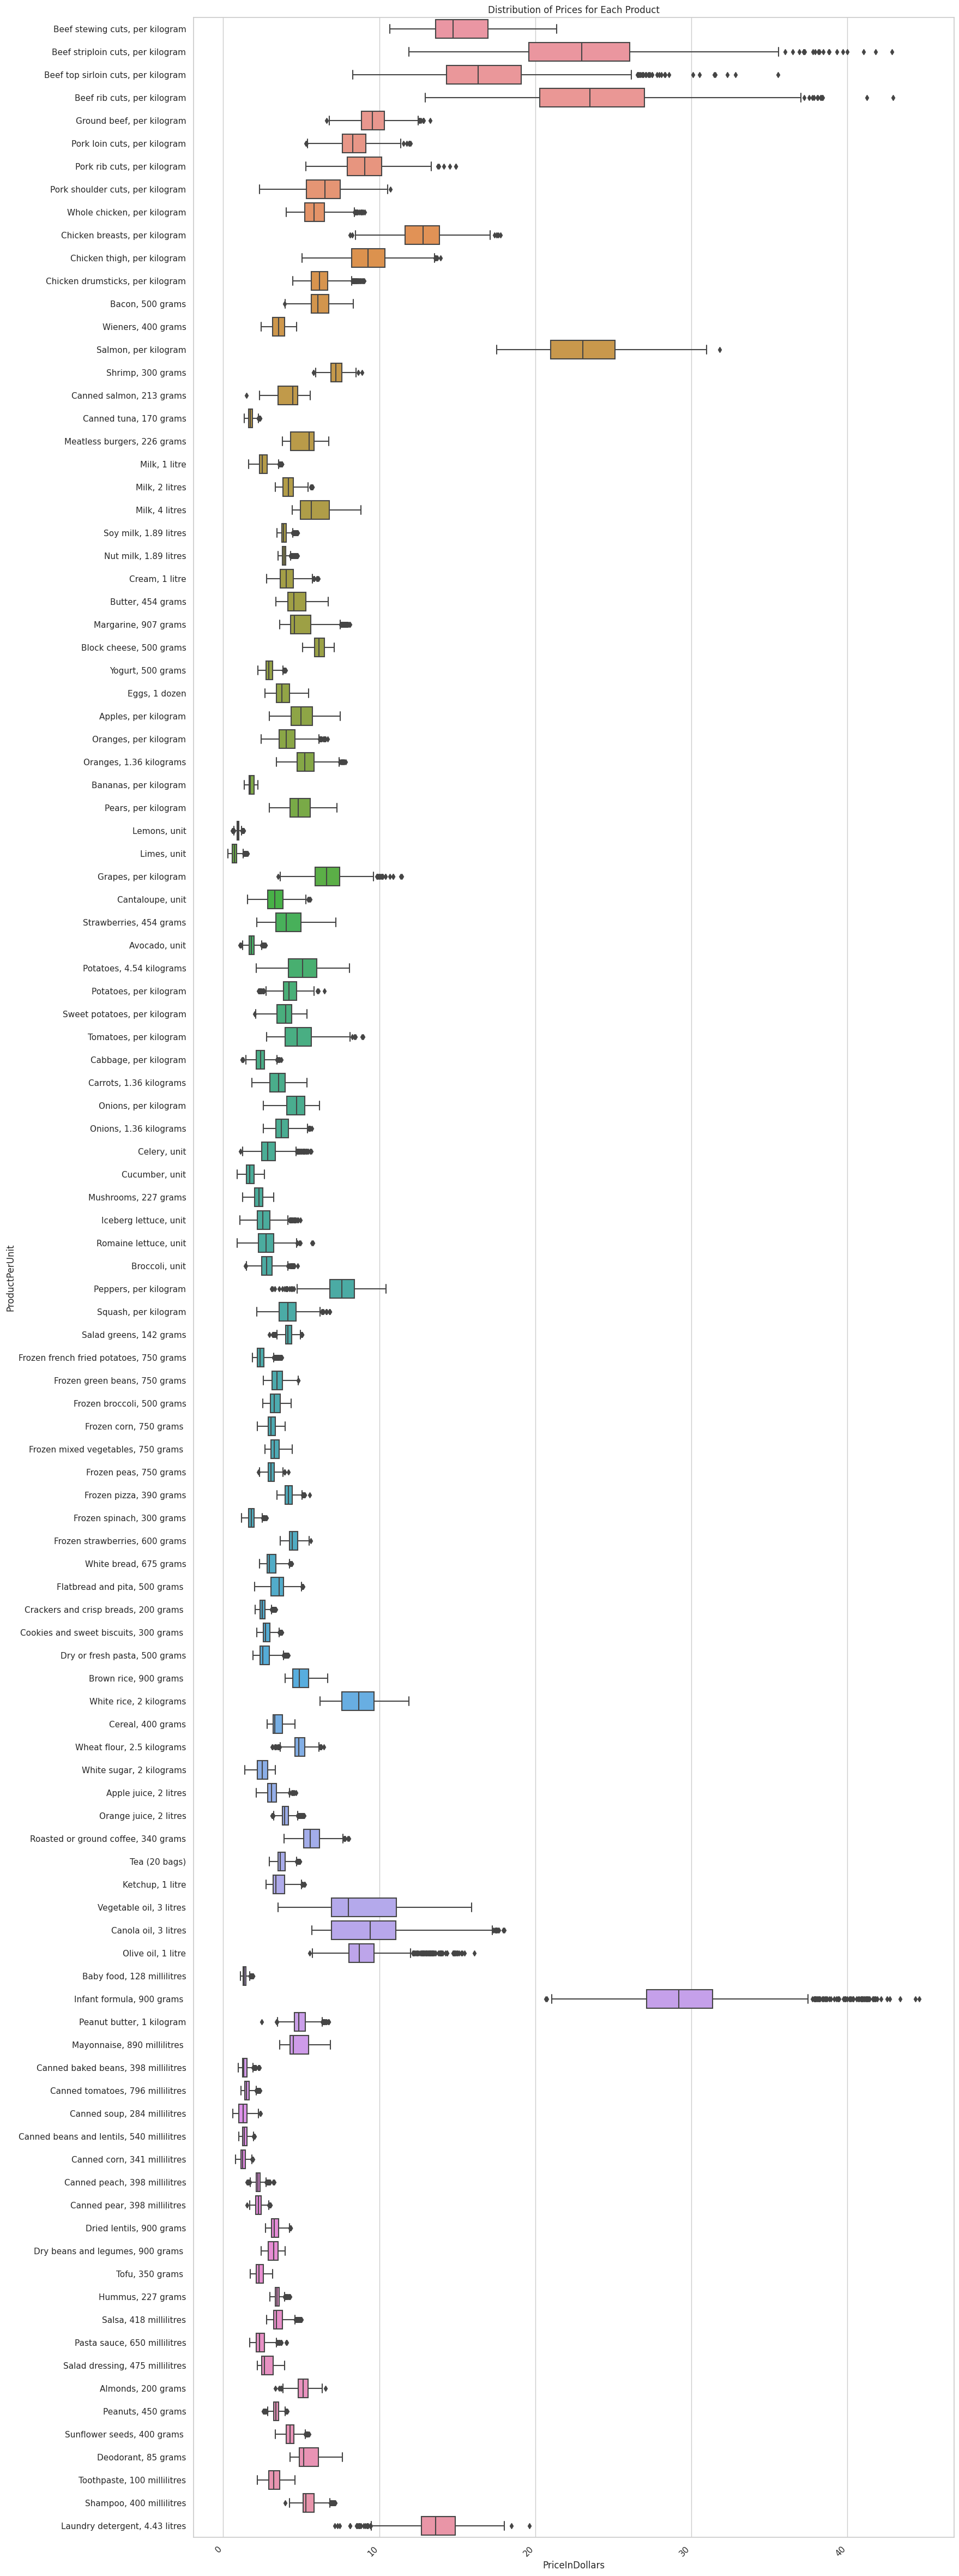

In [27]:
plt.figure(figsize=(18, 60))
sns.boxplot(y='Products', x='Price', data=df)
plt.title('Distribution of Prices for Each Product')
plt.ylabel('ProductPerUnit')
plt.xlabel('PriceInDollars')
# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')  
plt.show()

**NB: Check out Lemons and Limes on the plot above.**

# **Temporal trend in Prices for each Province and Canada as a whole**

In [28]:
# Convert 'Date' column to a NumPy array
date_array = np.array(df['Date'])

# Create a plotly line plot with subplots for each province
fig = px.line(df, x=date_array, y='Price', color='GeoLocation', 
              title='Temporal Trends in Prices Across Different Provinces',
              labels={'Date': 'Date', 'Price': 'Price', 'GeoLocation': 'Location'},
              facet_col='GeoLocation',
              facet_col_wrap=4,  # Adjusts the number of columns as needed
              )
fig.update_layout(showlegend=False)  # Hide legend to avoid duplication
fig.update_layout(height=1500,  # Set the height in pixels
                  width=1300,  # Set the width in pixels
                  )
fig.show()



**Note: June 2020 is a month of interest in terms of price hikes in all the provinces bar Prince Edward, New Brunswick.**

# **Price Distribution across Canada and its Provinces (2017-2023)**

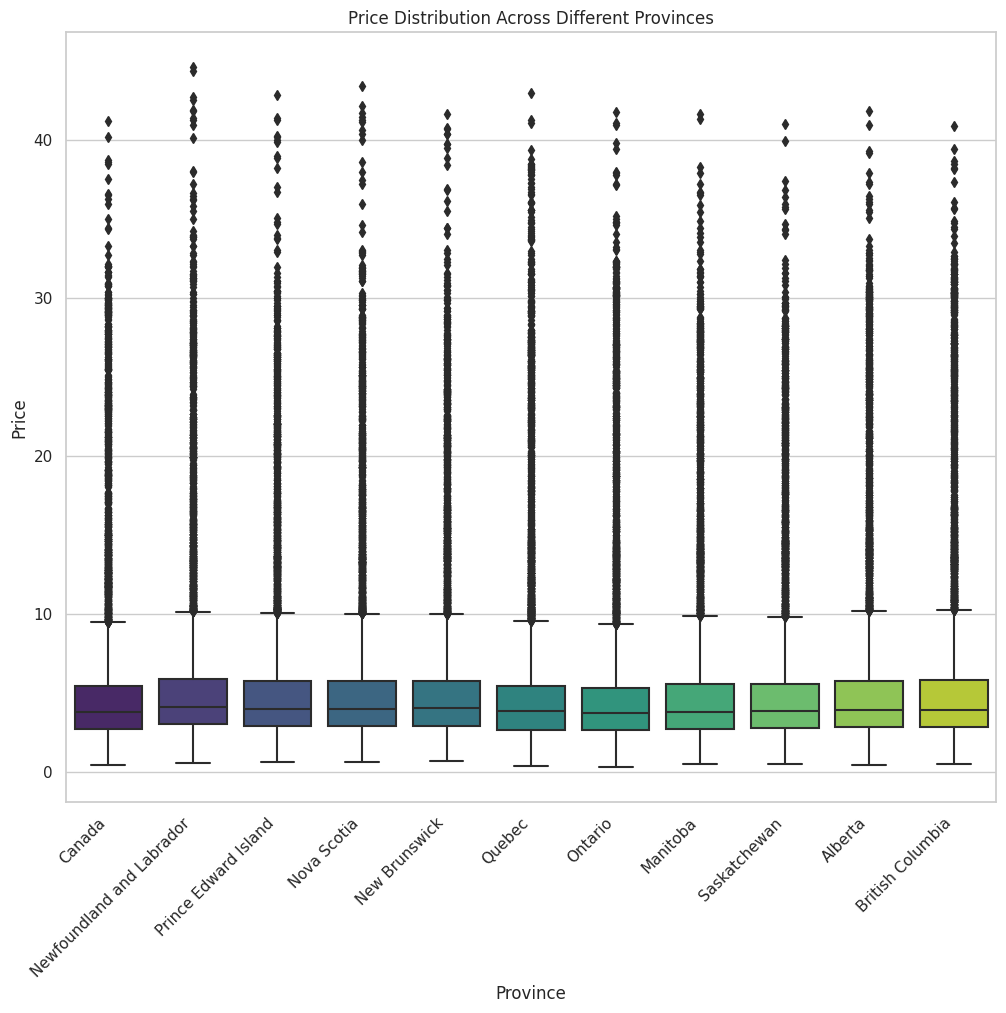

In [29]:
plt.figure(figsize=(12, 10))
sns.boxplot(x='GeoLocation', y='Price', data=df, palette='viridis')
plt.title('Price Distribution Across Different Provinces')
plt.xlabel('Province')
plt.ylabel('Price')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()

# **Most Expensive Product and the Cheapest Product since 2017.**

In [30]:
most_expensive_product = df.loc[df['Price'].idxmax()]

# Display the result
print("Most Expensive Product:")
print(most_expensive_product[['Products', 'Price', 'Date', 'GeoLocation']])


Most Expensive Product:
Products       Infant formula, 900 grams 
Price                               44.61
Date                  2023-06-01 00:00:00
GeoLocation     Newfoundland and Labrador
Name: 93288, dtype: object


In [31]:
cheapest_product = df.loc[df['Price'].idxmin()]

# Display the result
print("Cheapest Product:")
print(cheapest_product[['Products', 'Price','Date', 'GeoLocation']])

Cheapest Product:
Products               Limes, unit
Price                          0.3
Date           2017-10-01 00:00:00
GeoLocation                Ontario
Name: 11576, dtype: object


# **Top Ten Expensive Distinct Products and Top Ten Cheapest Distinct Products**

In [32]:
expensive_products_df = df.sort_values('Price', ascending=False).drop_duplicates(subset='Products')

# Select the top ten distinct products
top_ten_expensive_distinct_products = expensive_products_df.head(10)

# Display the result
print("Top Ten Expensive Distinct Products:")
print(top_ten_expensive_distinct_products[['Products', 'Price', 'Date']])

Top Ten Expensive Distinct Products:
                                  Products  Price       Date
93288           Infant formula, 900 grams   44.61 2023-06-01
99690          Beef rib cuts, per kilogram  42.93 2023-11-01
95731    Beef striploin cuts, per kilogram  42.85 2023-08-01
98480  Beef top sirloin cuts, per kilogram  35.55 2023-10-01
92447                 Salmon, per kilogram  31.81 2023-05-01
99797      Beef stewing cuts, per kilogram  21.36 2023-11-01
97378       Laundry detergent, 4.43 litres  19.62 2023-09-01
93395                 Canola oil, 3 litres  18.01 2023-06-01
79143        Chicken breasts, per kilogram  17.77 2022-06-01
99331                   Olive oil, 1 litre  16.08 2023-11-01


In [33]:
cheapest_products_df = df.sort_values('Price', ascending=True).drop_duplicates(subset='Products')

# Select the top ten distinct products
top_ten_cheapest_distinct_products = cheapest_products_df.head(10)

# Display the result
print("Top Ten Cheapest Distinct Products:")
print(top_ten_cheapest_distinct_products[['Products', 'Price', 'Date']])


Top Ten Cheapest Distinct Products:
                                        Products  Price       Date
11576                                Limes, unit   0.30 2017-10-01
30809                               Lemons, unit   0.57 2019-02-01
61090               Canned soup, 284 millilitres   0.62 2021-03-01
22514               Canned corn, 341 millilitres   0.80 2018-07-01
9065                       Romaine lettuce, unit   0.88 2017-08-01
9062                              Cucumber, unit   0.89 2017-08-01
41854        Canned baked beans, 398 millilitres   0.98 2019-11-01
1960   Canned beans and lentils, 540 millilitres   1.01 2017-02-01
1578                               Avocado, unit   1.07 2017-02-01
10273                      Iceberg lettuce, unit   1.08 2017-09-01


# **Scatter Plot for Date vs Price**

<Axes: xlabel='Date', ylabel='Price'>

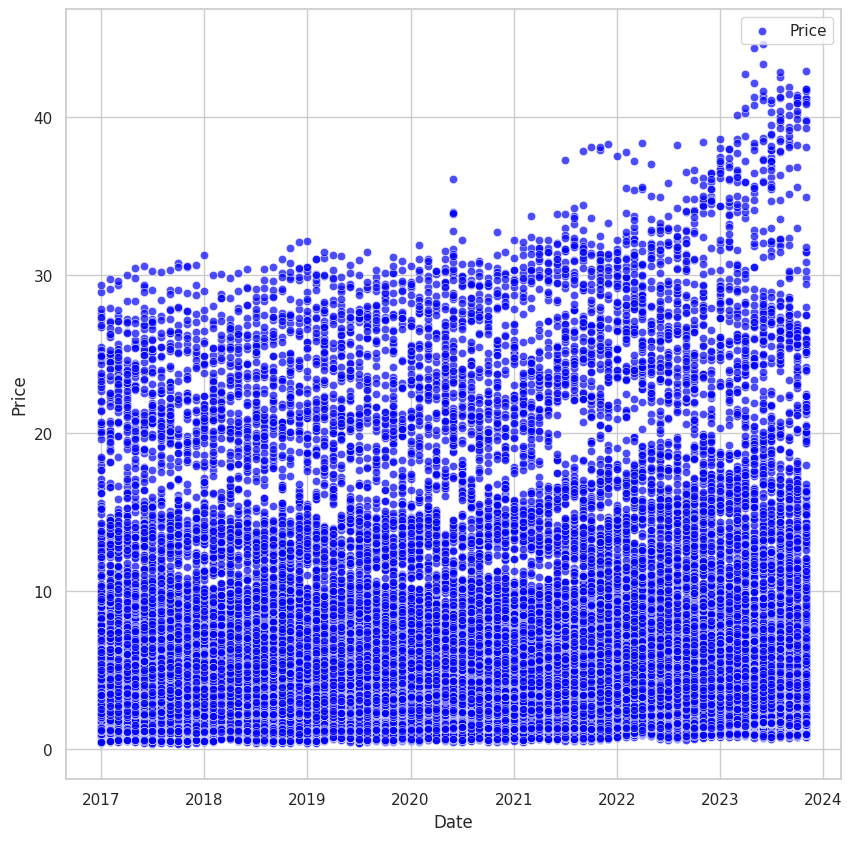

In [34]:
plt.figure(figsize=(10, 10))
sns.scatterplot(x='Date', y='Price', data=df, alpha=0.7, marker='o', color='blue', label='Price')



# **Price Variation between May 2020 and June 2020**

In [35]:
# Filter data for May 2020
may_2020_data = df[(df['Date'].dt.month == 5) & (df['Date'].dt.year == 2020)]

# Filter data for June 2020
june_2020_data = df[(df['Date'].dt.month == 6) & (df['Date'].dt.year == 2020)]

# Summary statistics for May and June prices
may_2020_stats = may_2020_data['Price'].describe()
june_2020_stats = june_2020_data['Price'].describe()

# Print the statistics for comparison
print("Summary Statistics for May 2020:")
print(may_2020_stats)

print("\nSummary Statistics for June 2020:")
print(june_2020_stats)

Summary Statistics for May 2020:
count    1209.000000
mean        5.291886
std         5.011017
min         0.490000
25%         2.770000
50%         3.960000
75%         5.410000
max        31.550000
Name: Price, dtype: float64

Summary Statistics for June 2020:
count    1209.000000
mean        5.387858
std         5.318303
min         0.420000
25%         2.860000
50%         3.930000
75%         5.550000
max        36.070000
Name: Price, dtype: float64


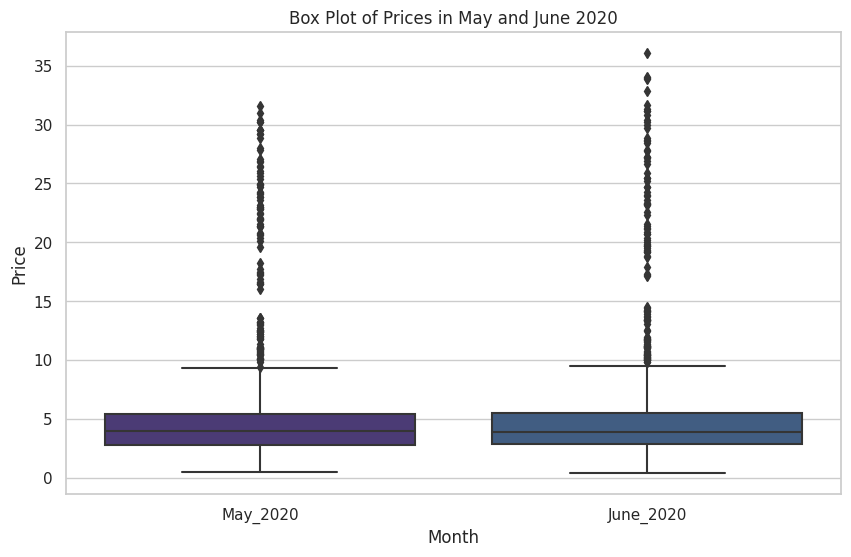

In [36]:
combined_data = pd.concat([may_2020_data.assign(Month='May_2020'), june_2020_data.assign(Month='June_2020')])

# Box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Month', y='Price', data=combined_data)
plt.title('Box Plot of Prices in May and June 2020')
plt.xlabel('Month')
plt.ylabel('Price')
plt.show()

# **Price Variation between January 2023 and November 2023**

In [37]:
# Filter data for January 2023
jan_2023_data = df[(df['Date'].dt.month == 1) & (df['Date'].dt.year == 2023)]

# Filter data for November 2023
nov_2023_data = df[(df['Date'].dt.month == 11) & (df['Date'].dt.year == 2023)]

# Summary statistics for January and November prices
jan_2023_stats = jan_2023_data['Price'].describe()
nov_2023_stats = nov_2023_data['Price'].describe()

# Print the statistics for comparison
print("Summary Statistics for January 2023:")
print(jan_2023_stats)

print("\nSummary Statistics for November 2023:")
print(nov_2023_stats)

Summary Statistics for January 2023:
count    1209.000000
mean        6.120579
std         5.701128
min         0.740000
25%         3.330000
50%         4.440000
75%         6.450000
max        38.640000
Name: Price, dtype: float64

Summary Statistics for November 2023:
count    1209.000000
mean        6.338114
std         6.117048
min         0.790000
25%         3.390000
50%         4.540000
75%         6.640000
max        42.930000
Name: Price, dtype: float64


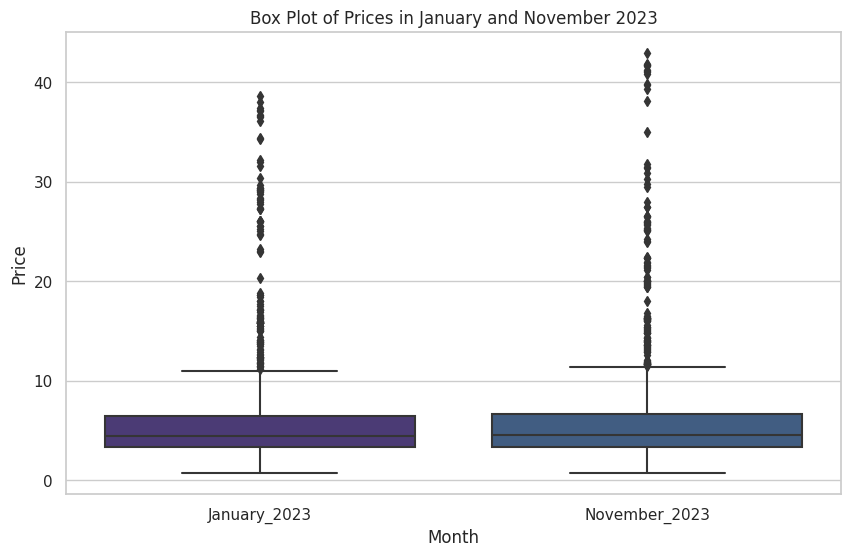

In [38]:
combined_data = pd.concat([jan_2023_data.assign(Month='January_2023'), nov_2023_data.assign(Month='November_2023')])

# Box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Month', y='Price', data=combined_data)
plt.title('Box Plot of Prices in January and November 2023')
plt.xlabel('Month')
plt.ylabel('Price')
plt.show()

# **Summary**

In conclusion, this analysis sheds light on the dynamics of food prices in Canada from 2017 to 2023, utilizing a dataset sourced from Statistics Canada. Through exploratory data analysis, we uncovered trends, variations, and potential influences on food prices. Notably, the impact of inflation emerged as a significant factor, (COVID-19 as well) influencing the fluctuations observed in the dataset. The comprehensive analysis provided valuable insights into the economic context surrounding food pricing, with implications for consumer behavior and market conditions. Supply chain interruptions can also be a significant factor in the price hikes seen over the years.